LightGBM with scikit Learn

In [55]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, matthews_corrcoef


Without Features selection 

In [56]:
file_path = "../../../data/processed/train_data.csv"
df = pd.read_csv(file_path)
file_path2= "../../../data/processed/test_data.csv"
df2 = pd.read_csv(file_path2)

In [57]:
X_train = df.drop(columns=['target'])
y_train = df['target']
X_test = df2.drop(columns=['target'])
y_test = df2['target']

# Model
model = lgb.LGBMClassifier(
    learning_rate=0.1,   
    n_estimators=300,   
    max_bin=70,         
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
)

# Predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]  
y_pred = (y_pred_prob > 0.5).astype(int)  

# Feature importances
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")




[LightGBM] [Info] Number of positive: 416, number of negative: 430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52656
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 753
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491726 -> initscore=-0.033100
[LightGBM] [Info] Start training from score -0.033100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [58]:
#evaluation 
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.4f}")
print(f"Accuracy : {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Erreur Quadratique Moyenne (MSE) : 0.0355
Accuracy : 96.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       134
           1       0.99      0.95      0.97       148

    accuracy                           0.96       282
   macro avg       0.96      0.97      0.96       282
weighted avg       0.97      0.96      0.96       282



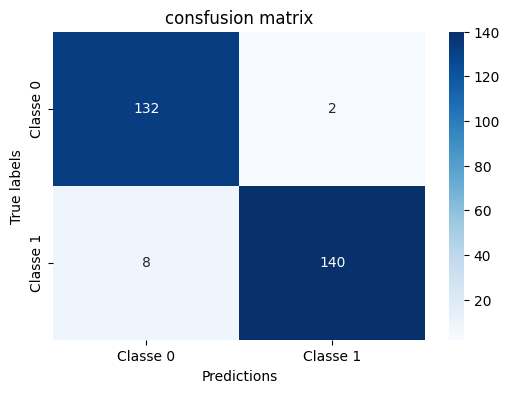

In [59]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, (y_pred >= 0.5).astype(int))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("consfusion matrix")
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.show()


AUC : 99.70%
MCC : 0.93


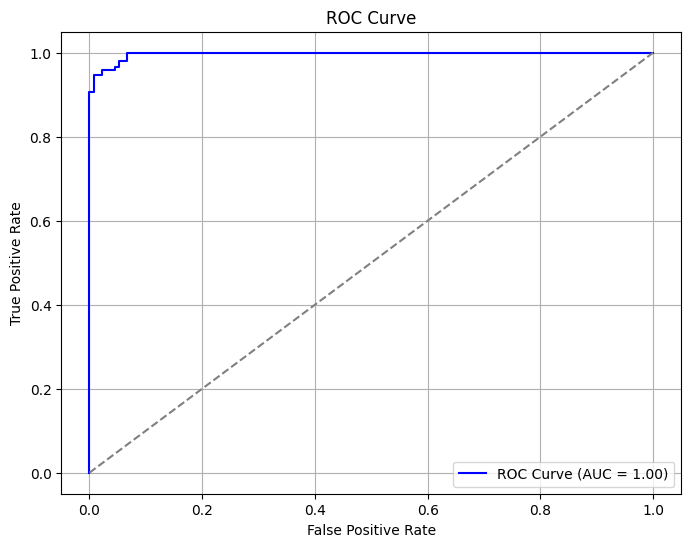

In [60]:

y_prob = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # ROC
roc_auc = auc(fpr, tpr)                           # AUC

# ROC
print(f"AUC : {roc_auc:.2%}")

# Calcul MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC : {mcc:.2f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


With features Selection

In [61]:
df1= pd.read_csv("../../../data/processed/train_filtered.csv")
df_test=pd.read_csv("../../../data/processed/test_filtered.csv")
X_train1 = df1.drop(columns=['target'])
y_train1 = df1['target']
X_test1 = df_test.drop(columns=['target'])
y_test1 = df_test['target']

In [62]:

#model 
model = lgb.LGBMClassifier(
    objective='binary',  
    learning_rate=0.1,
    n_estimators=300,
    random_state=42,
    max_bin=70,  
)

model.fit(
    X_train1, y_train1,
    eval_set=[(X_test1, y_test1)],
    eval_metric='logloss',
)
#predictions
y_pred_prob = model.predict_proba(X_test1)[:, 1]  
y_pred = (y_pred_prob > 0.5).astype(int)


# Feature importances
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


[LightGBM] [Info] Number of positive: 416, number of negative: 430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491726 -> initscore=-0.033100
[LightGBM] [Info] Start training from score -0.033100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [63]:
# Evaluation
mse = mean_squared_error(y_test1, y_pred)
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.4f}")
accuracy = accuracy_score(y_test1, y_pred)

print(f"Accuracy : {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test1, y_pred))


Erreur Quadratique Moyenne (MSE) : 0.0426
Accuracy : 95.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       134
           1       0.98      0.94      0.96       148

    accuracy                           0.96       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.96      0.96      0.96       282



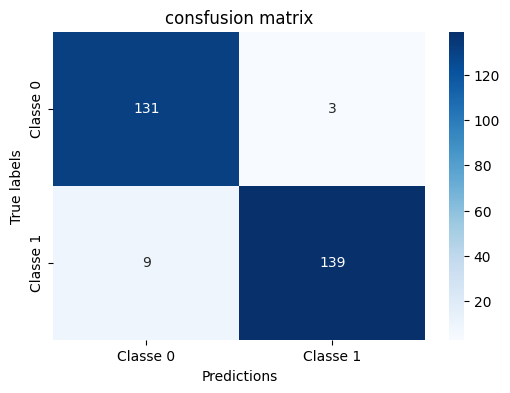

In [64]:
#confusion matrix
conf_matrix = confusion_matrix(y_test1, (y_pred >= 0.5).astype(int))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("consfusion matrix")
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.show()


AUC : 99.56%
MCC : 0.92


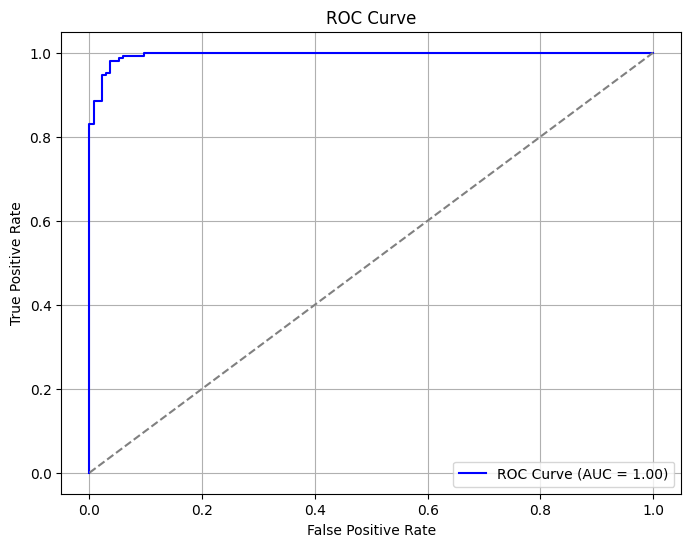

In [65]:

y_prob = model.predict_proba(X_test1)[:, 1]

y_pred = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)  # ROC
roc_auc = auc(fpr, tpr)                           # AUC

# ROC
print(f"AUC : {roc_auc:.2%}")

# Calcul MCC
mcc = matthews_corrcoef(y_test1, y_pred)
print(f"MCC : {mcc:.2f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
